In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('Dataset/kaggle_diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

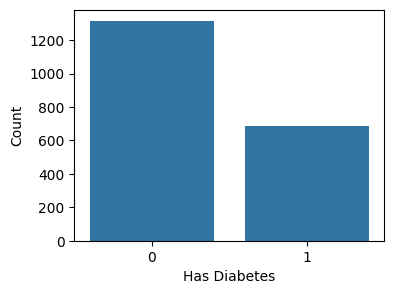

In [7]:
plt.figure(figsize=(4,3))
sns.countplot(x = 'Outcome', data = data)
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

Data Preprocessing

In [8]:
data_copy = data.copy(deep=True)
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

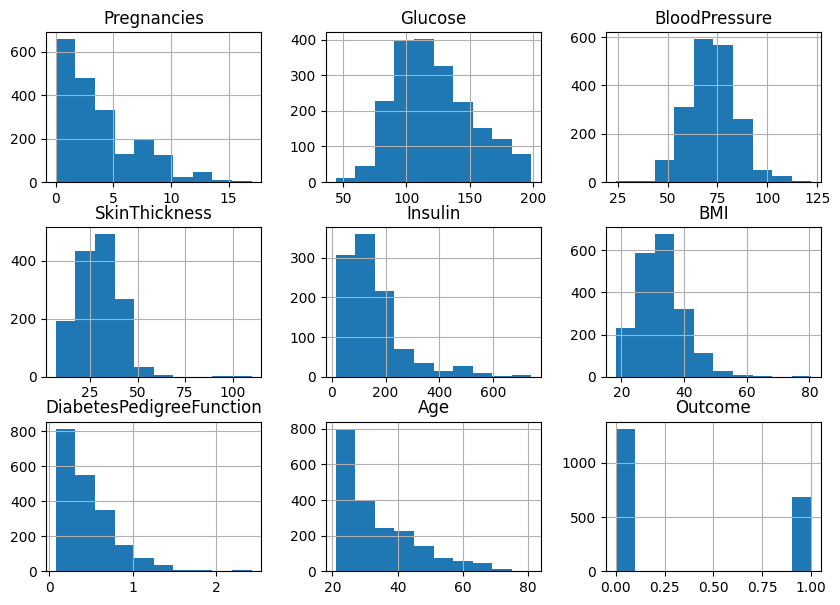

In [9]:
data_copy.hist(figsize=(10,7))

In [10]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].mean(), inplace=True)

In [11]:
data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

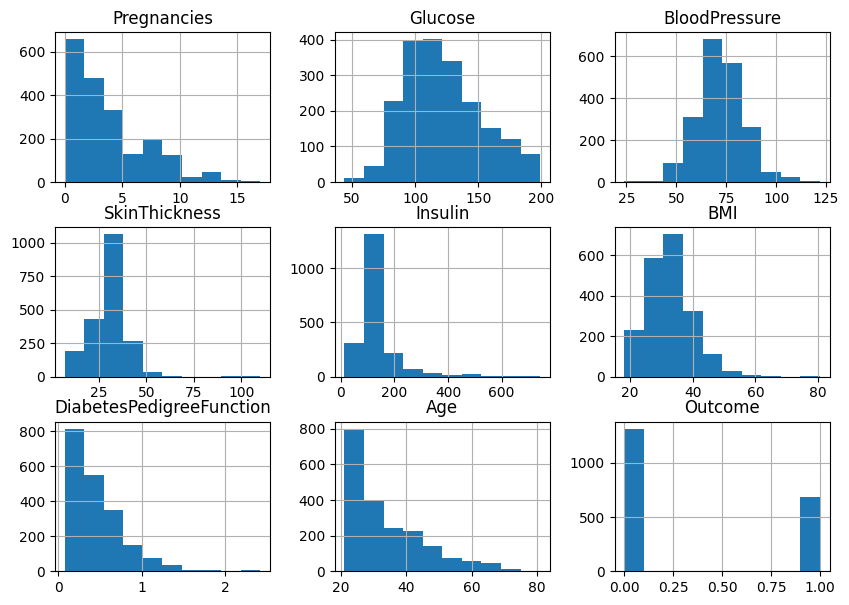

In [12]:
data_copy.hist(figsize=(10,7))

# Model building

In [18]:
from sklearn.model_selection import train_test_split

X = data_copy.drop(columns= 'Outcome')
Y = data_copy['Outcome']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XtrainScaled = sc.fit_transform(Xtrain)
XtestScaled = sc.transform(Xtest)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
def find_best_model(X, Y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver= 'lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1, 5, 10]
            }
        },

        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },

        'random_forest': {
            'model': RandomForestClassifier(),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        }
    }

    scores = []

    for model_name, model_params in models.items():
        grid = GridSearchCV(model_params['model'], model_params['parameters'], cv=5)
        grid.fit(X, Y)
        scores.append({
            'model': model_name,
            'best_param': grid.best_params_,
            'score': grid.best_score_
        })
    return pd.DataFrame(scores, columns= ['model', 'best_param', 'score'])

find_best_model(Xtrain, Ytrain)


,model,best_param,score
0,logistic_regression,{'C': 5},0.772500
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 10}",0.898750
2,random_forest,{'n_estimators': 200},0.956875


In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(n_estimators=200), Xtrain, Ytrain, cv = 5)
print("Average Accuracy: ", round(sum(scores) * 100)/len(scores))

Average Accuracy:  95.4


In [32]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(Xtrain, Ytrain)

RandomForestClassifier(n_estimators=200)

# Model Evaluation

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
ypred_test = rf.predict(Xtest)
ypred_train = rf.predict(Xtrain)
cm_test = confusion_matrix(Ytest, ypred_test)
cm_train = confusion_matrix(Ytrain, ypred_train)

print(cm_train, cm_test)

[[1063    0]
 [   0  537]] [[251   2]
 [  2 145]]


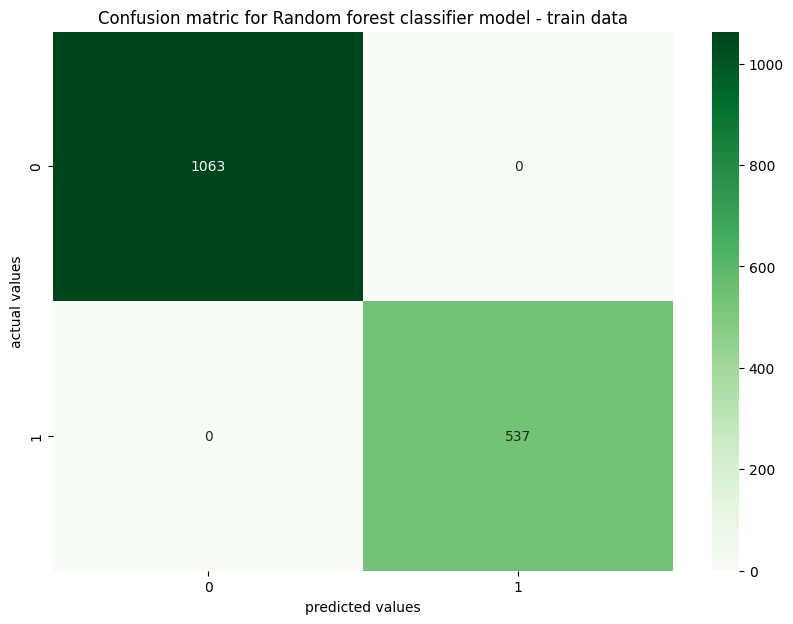

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_train, annot = True, cmap = 'Greens', fmt='g')
plt.title('Confusion matric for Random forest classifier model - train data')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

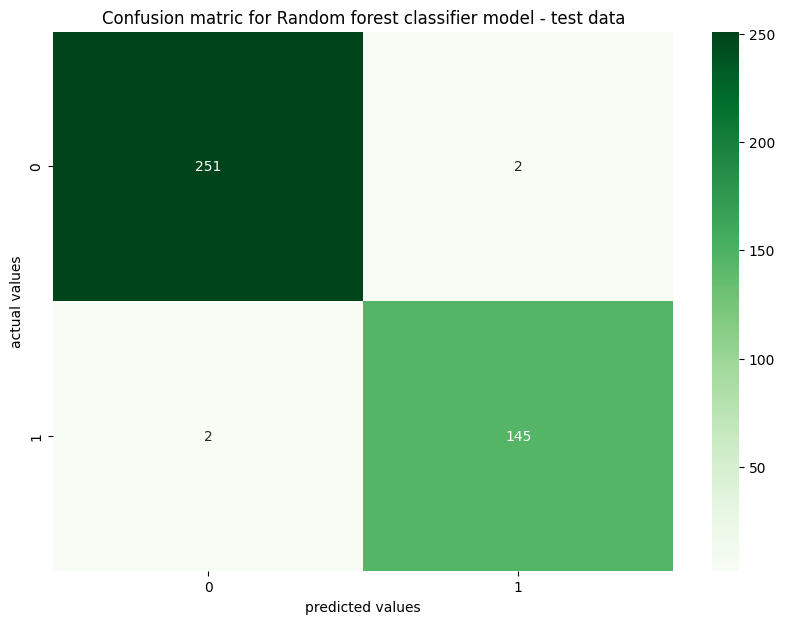

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_test, annot = True, cmap = 'Greens', fmt='g')
plt.title('Confusion matric for Random forest classifier model - test data')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

In [48]:
print("Accuracy on train ", accuracy_score(Ytrain,ypred_train) * 100)
print("Accuracy on test ", accuracy_score(Ytest,ypred_test) * 100)

Accuracy on train  100.0
Accuracy on test  99.0


In [49]:
print(classification_report(Ytrain, ypred_train))
print(classification_report(Ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1063
           1       1.00      1.00      1.00       537

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       253
           1       0.99      0.99      0.99       147

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



# Prediction

In [50]:
def predict_diabetes(Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BP)
    insulin = float(Insulin)
    st = float(SkinThickness)
    bmi = float(BMI)
    dpf = float(DiabetesPedigreeFunction)
    age = int(Age)

    x = [[preg, glucose, bp, insulin, st, bmi, dpf, age]]
    x = sc.transform(x)

    return rf.predict(x)


In [51]:
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [52]:
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [53]:
prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.
